# Part 1:
# 1.1 First Bullet Point: I will be using the heuristic method known as Hill-Climbing in order to find a solution to this 
# particular problem. To do so I will represent the solution as a list of binary digits of length n where n is the number 
# of items.
# 1.1 Second Bullet Point: To quantify the quality of the canditate solution I will find the difference between the two
# canditate values and the smallest difference represents being part of the best canditate solution

Best Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 Best Value: 543143
 Trace: [852283, 543143, 649871, 688481, 2458967, 4439709, 5219457, 6015745, 6579311, 8029285, 8536335, 9444819, 9566625, 11661103, 12876537, 13854165, 14273597, 15233097, 16564495, 18310081, 19582501, 21174723, 22104567, 23739545, 24620161, 25114749, 25508425, 27278871]


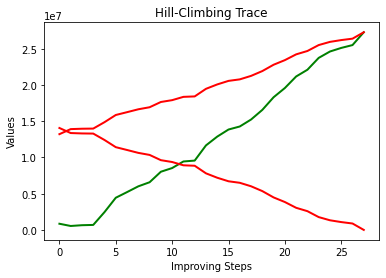

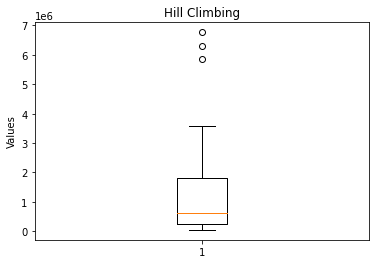

In [2]:
# 1.2:

import csv
import random as rnd
import matplotlib.pyplot as plt

def read_art_data(fname):       
    rows = []
    with open(fname, 'r') as file: 
        csvreader = csv.reader(file)
        n = len(next(csvreader))
        for row in csvreader:
            rows.append(row)
    return n, rows
    

# Reading data from a file, in this example the instance with 5 items
artfile = "values50.csv"     
n, values = read_art_data(artfile)

# # To increase the chance of generating a valid solution, we produce a random string with less number of 1's than 0's
# # Output: a random solution, as well as its value and weight 

def random_sol(l):
    sol = rnd.choices([0,1], weights=[50, 50], k = l)
    return sol

solution = random_sol(n)

    # Implementation using a for loop
def evaluate(sol):
    AnneVal = 0
    BobVal = 0
    for i in range(n):
        if sol[i] == 1:
            AnneVal += int(values[0][i])
        if sol[i] == 0:
            BobVal += int(values[0][i]) 
    return AnneVal, BobVal

def neighbour(sol) :
    neig = sol[:]
    i = rnd.randint(0, n-1)
    neig[i] = 0 if sol[i] == 1 else 1
    return neig

neig = neighbour(solution)

def hill_climbing(maxiter):
    trace = []
    t = []
    s = random_sol(n)
    v = evaluate(s)
    trace.append(v)
    for i in range(maxiter):
        s1 = neighbour(s)
        v1 = evaluate(s1)
        if v1 >= v:
            v = v1
            s = s1[:]
            trace.append(v)
    for j in trace:
        v2 = j[0] - j[1]
        if v2 < 0:
             v2 *= -1
        t.append(v2)
    v = min(t)
    return s, v, t, trace

# 1.3

ntries = 200 # Could implement with a random number generator to try with different number
nruns = 30
s, v, t, trace = hill_climbing(ntries)
print(f'Best Solution: {s}\n Best Value: {v}\n Trace: {t}')

plt.plot(t, color='green', linewidth=2)
plt.title('Hill-Climbing Trace')
plt.ylabel('Values')
plt.xlabel('Improving Steps')

plt.plot(trace, color='red', linewidth=2)
plt.title('Hill-Climbing Trace')
plt.ylabel('Values')
plt.xlabel('Improving Steps')
plt.show()

hc_vals = []
for i in range(nruns):
    s, v, t, trace = hill_climbing(ntries)
    hc_vals.append(v)

plt.title("Hill Climbing")
plt.ylabel("Values")
plt.boxplot(hc_vals)
plt.show()